# FR: 2008 - 2019 dataset EDA

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt


In [2]:
# read in data

df = pd.read_pickle("../../data/final/final_dataset_7-20.pkl")

In [3]:
df.head()

,original index,PROJECT_ID,ABSTRACT,FY,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,...,working_abstract,Start_Char,nchar,LAST_CHAR,lemma_abstract,clean_lemmas,stopwds_removed,n_grams_added,final_tokens,final_frqwds_removed
0,17608,152242,The multiprotein complex y-secretase proteolyt...,2008,Active Sites; Affect; Alzheimer's Disease; Amy...,STRUCTURE OF SIGNAL PEPTIDE PEPTIDASE,HHS,NIH,NaN,5F32AG027647-03,...,The multiprotein complex y-secretase proteolyt...,T,1402,g,"[multiprotein, complex, y-secretase, proteolyt...","[multiprotein, complex, y-secretase, proteolyt...","[multiprotein, complex, y-secretase, proteolyt...","[multiprotein, complex, y-secretase, proteolyt...","[multiprotein, complex, y_secretase, proteolyt...","[multiprotein, y_secretase, proteolytically_cl..."
1,111864,190316,DESCRIPTION (provided by applicant): The Kis...,2008,Affect; Animal Model; Axon; Behavior; Behavior...,ROLE OF KISS1 NEURONS IN THE SEASONAL AND CIRC...,HHS,NIH,NaN,5K99HD056157-02,...,The Kissl gene encodes peptides called kisspep...,T,2553,y,"[Kissl, gene, encode, peptide, call, kisspepti...","[kissl, gene, encode, peptide, call, kisspepti...","[kissl, gene, encode, peptide, kisspeptin, bin...","[kissl, gene, encode, peptide, kisspeptin, bin...","[kissl, gene, encode, peptide, kisspeptin, bin...","[kissl, gene, encode, peptide, kisspeptin, bin..."
2,22052,154213,DESCRIPTION (provided by applicant): The objec...,2008,Agreement; Antibodies; base; Binding; Biochemi...,CARBONIC ANHYDRASE AS A MODEL TO UNDERSTAND DI...,HHS,NIH,NaN,5F32GM076971-02,...,The objective of this research is to understan...,T,1414,e,"[objective, research, be, understand, biophysi...","[objective, research, be, understand, biophysi...","[objective, research, understand, biophysical,...","[objective, research, understand, biophysical,...","[objective, research, understand, biophysical,...","[biophysical, basis, thermodynamics_kinetic, m..."
3,35004,159362,Obesity is the cause of many adverse pregnancy...,2008,African; Analysis of Variance; Asians; Birth; ...,OBESITY ON VAGAL TONE AND HBA1C DURING PREGNANCY,HHS,NIH,NaN,5F31NR009611-03,...,Obesity is the cause of many adverse pregnancy...,O,1545,d,"[obesity, cause, many, adverse, pregnancyoutco...","[obesity, cause, many, adverse, pregnancyoutco...","[obesity, cause, adverse, pregnancyoutcome, re...","[obesity, cause, adverse_pregnancyoutcome, res...","[obesity, cause, adverse_pregnancyoutcome, res...","[obesity, adverse_pregnancyoutcome, great, hea..."
4,371628,594482,Local potato advisory groups have expressed in...,2010,cost; Health; interest; Manure; Parasitic nema...,PLANT-PARASITIC NEMATODE MANAGEMENT AS A COMPO...,USDA,NIFA,NaN,0219605,...,Local potato advisory groups have expressed in...,L,271,s,"[local, potato, advisory, group, express, inte...","[local, potato, advisory, group, express, inte...","[local, potato, advisory, group, express, inte...","[local, potato, advisory, group, express, inte...","[local, potato, advisory, group, express, inte...","[local, potato, advisory, express, interest, m..."


Text(0.5, 1.0, 'Abstract County by Project Start Year')

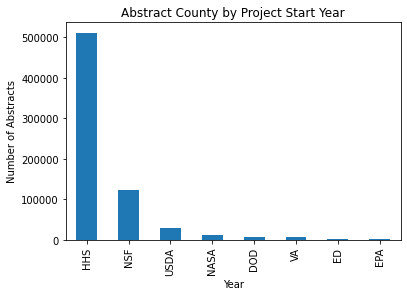

In [34]:
# plot number of abstracts by department

y = df["DEPARTMENT"].value_counts()
y.plot(kind = 'bar')
plt.ylabel('Number of Abstracts')
plt.xlabel('Year')
plt.title('Abstract County by Project Start Year')


In [32]:
# Extract Year from PROJECT_START_DATE

# On our graphs, we want to be able to show year. Therefore, this getYear function gets the year from 
# different date formats from Project Start Year/End Year

#START

def getYear(a):   
    a = str(a)
    if a.find("/"):
        splitdate = a.split("/")
        if len(splitdate) == 3:
            a = splitdate[2]
        else:
            a = splitdate[0]
    year = str(a)
    return year

df['START_YEAR'] = df['PROJECT_START_DATE'].apply(getYear)
df['START_YEAR'].astype(int)

0         2005
1         2007
2         2007
3         2006
4         2009
          ... 
690850    2018
690851    2019
690852    2018
690853    2019
690854    2018
Name: START_YEAR, Length: 690814, dtype: int64

Text(0.5, 1.0, 'Abstract County by Project Start Year')

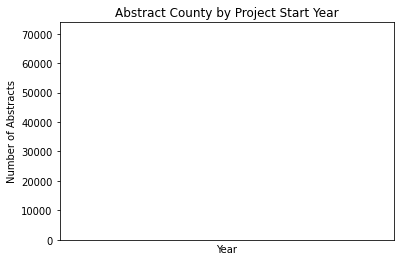

In [30]:
# plot number of abstracts by Start_Year

df_filter = df[df['START_YEAR'] > 2007 and df['START_YEAR'] < 2020]
y = df_filter['START_YEAR'].value_counts().sort_index()



y.plot(kind = 'bar')
plt.xlim(2008,2019)
plt.ylabel('Number of Abstracts')
plt.xlabel('Year')
plt.title('Abstract County by Project Start Year')

In [33]:
df_filter = df[df['START_YEAR'] > 2007 and df['START_YEAR'] < 2020]

TypeError: '>' not supported between instances of 'str' and 'int'